In [1]:
!pip install ucimlrepo

# Data Initalize

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature and target datasets
features_df = pd.read_csv('feature.csv')
target_df = pd.read_csv('target.csv')

# Display the first few rows of each dataset
features_df.head(), target_df.head()

(   Unnamed: 0   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
 0           0  77.0    1       2.0        1.0        1.0       2.0       NaN   
 1           1  55.0    1       1.0        0.0        0.0       0.0       0.0   
 2           2  52.0    1       0.0        0.0        0.0       2.0       NaN   
 3           3  68.0    0       0.0        0.0        0.0       2.0       NaN   
 4           4  60.0    1       0.0        0.0        0.0       2.0       NaN   
 
     GB  SIM_GIPERT  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
 0  3.0         0.0  ...         0.0         0.0         0.0      1.0   
 1  0.0         0.0  ...         1.0         0.0         0.0      1.0   
 2  2.0         0.0  ...         3.0         2.0         2.0      1.0   
 3  2.0         0.0  ...         0.0         0.0         0.0      0.0   
 4  3.0         0.0  ...         0.0         0.0         0.0      0.0   
 
    B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
 0

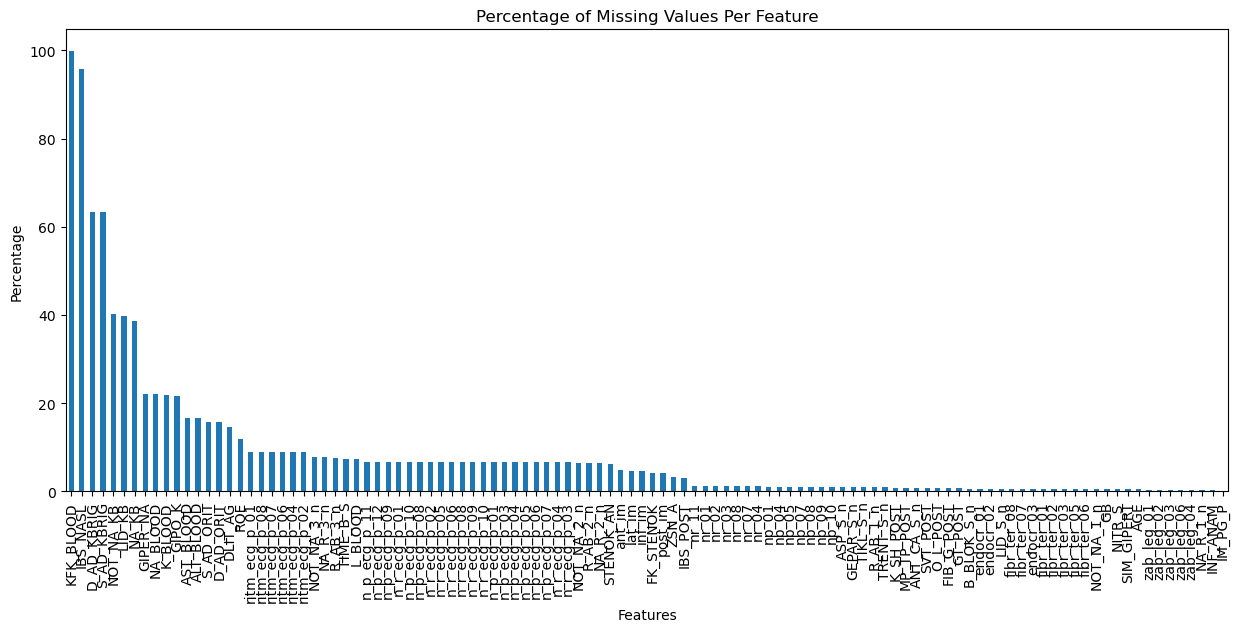

(AGE           0.470588
 SEX           0.000000
 INF_ANAM      0.235294
 STENOK_AN     6.235294
 FK_STENOK     4.294118
                 ...   
 ANT_CA_S_n    0.764706
 GEPAR_S_n     1.000000
 ASP_S_n       1.000000
 TIKL_S_n      0.941176
 TRENT_S_n     0.941176
 Length: 111, dtype: float64,
     AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
 0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
 1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
 2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
 3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
 4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   
 
    SIM_GIPERT  DLIT_AG  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
 0         0.0      7.0  ...         0.0         0.0         0.0      1.0   
 1         0.0      0.0  ...         1.0         0.0         0.0      1.0   
 2         0.0      2.0  ... 

In [4]:
# Remove the first unnecessary column if it exists
if 'Unnamed: 0' in features_df.columns:
    features_df.drop(columns='Unnamed: 0', inplace=True)
if 'Unnamed: 0' in target_df.columns:
    target_df.drop(columns='Unnamed: 0', inplace=True)

# Calculate the percentage of missing values for each feature
missing_percentages = features_df.isnull().mean() * 100

# Visualize the missing data percentages
plt.figure(figsize=(15, 6))
missing_percentages[missing_percentages > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Missing Values Per Feature')
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.show()

missing_percentages, features_df.head()

In [5]:
from sklearn.impute import KNNImputer

# Removing features with missing value percentage greater than 30%
columns_to_drop = missing_percentages[missing_percentages > 30].index
features_df_reduced = features_df.drop(columns=columns_to_drop)

# Imputing missing values for features with less than 30% missing using KNN
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
features_imputed = pd.DataFrame(knn_imputer.fit_transform(features_df_reduced), columns=features_df_reduced.columns)

# Check the new missing percentages after imputation
new_missing_percentages = features_imputed.isnull().mean() * 100

# Display the first few rows of the imputed features dataframe to show the filled values
features_imputed.head()


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


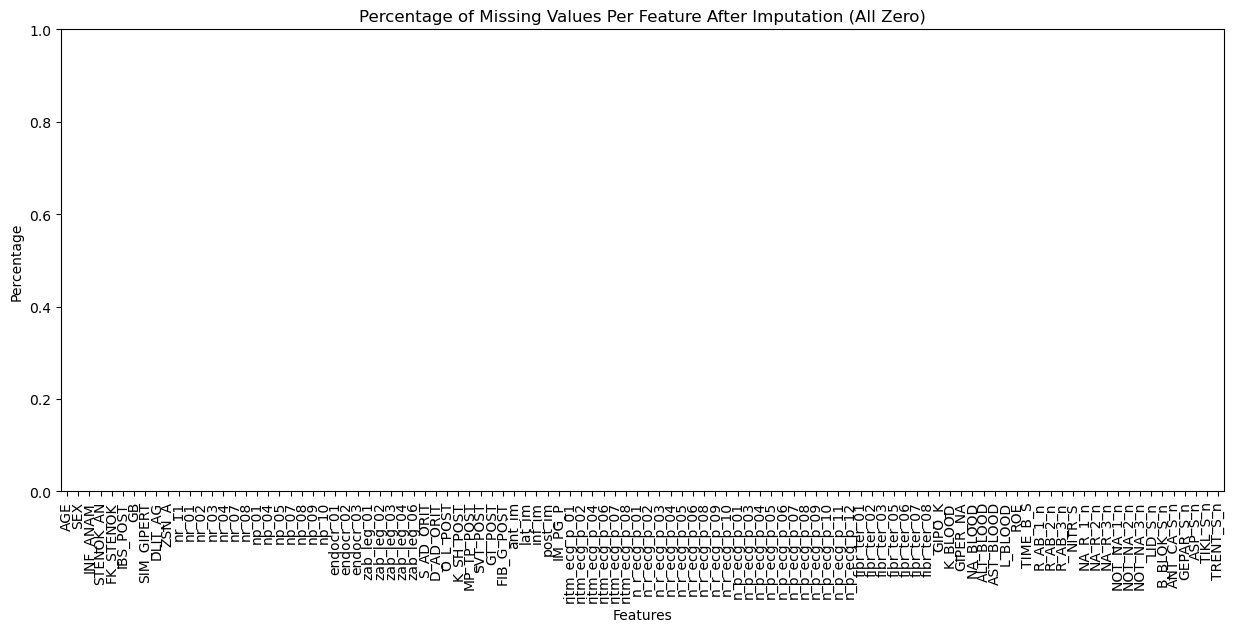

In [6]:
# Re-calculate the percentage of missing values after imputation
imputed_missing_percentages = features_imputed.isnull().mean() * 100

# Visualize the missing data percentages after imputation
plt.figure(figsize=(15, 6))
imputed_missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values Per Feature After Imputation (All Zero)')
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.ylim(0, 1)  # Adjusting y-axis to show close to 0 values clearly
plt.show()

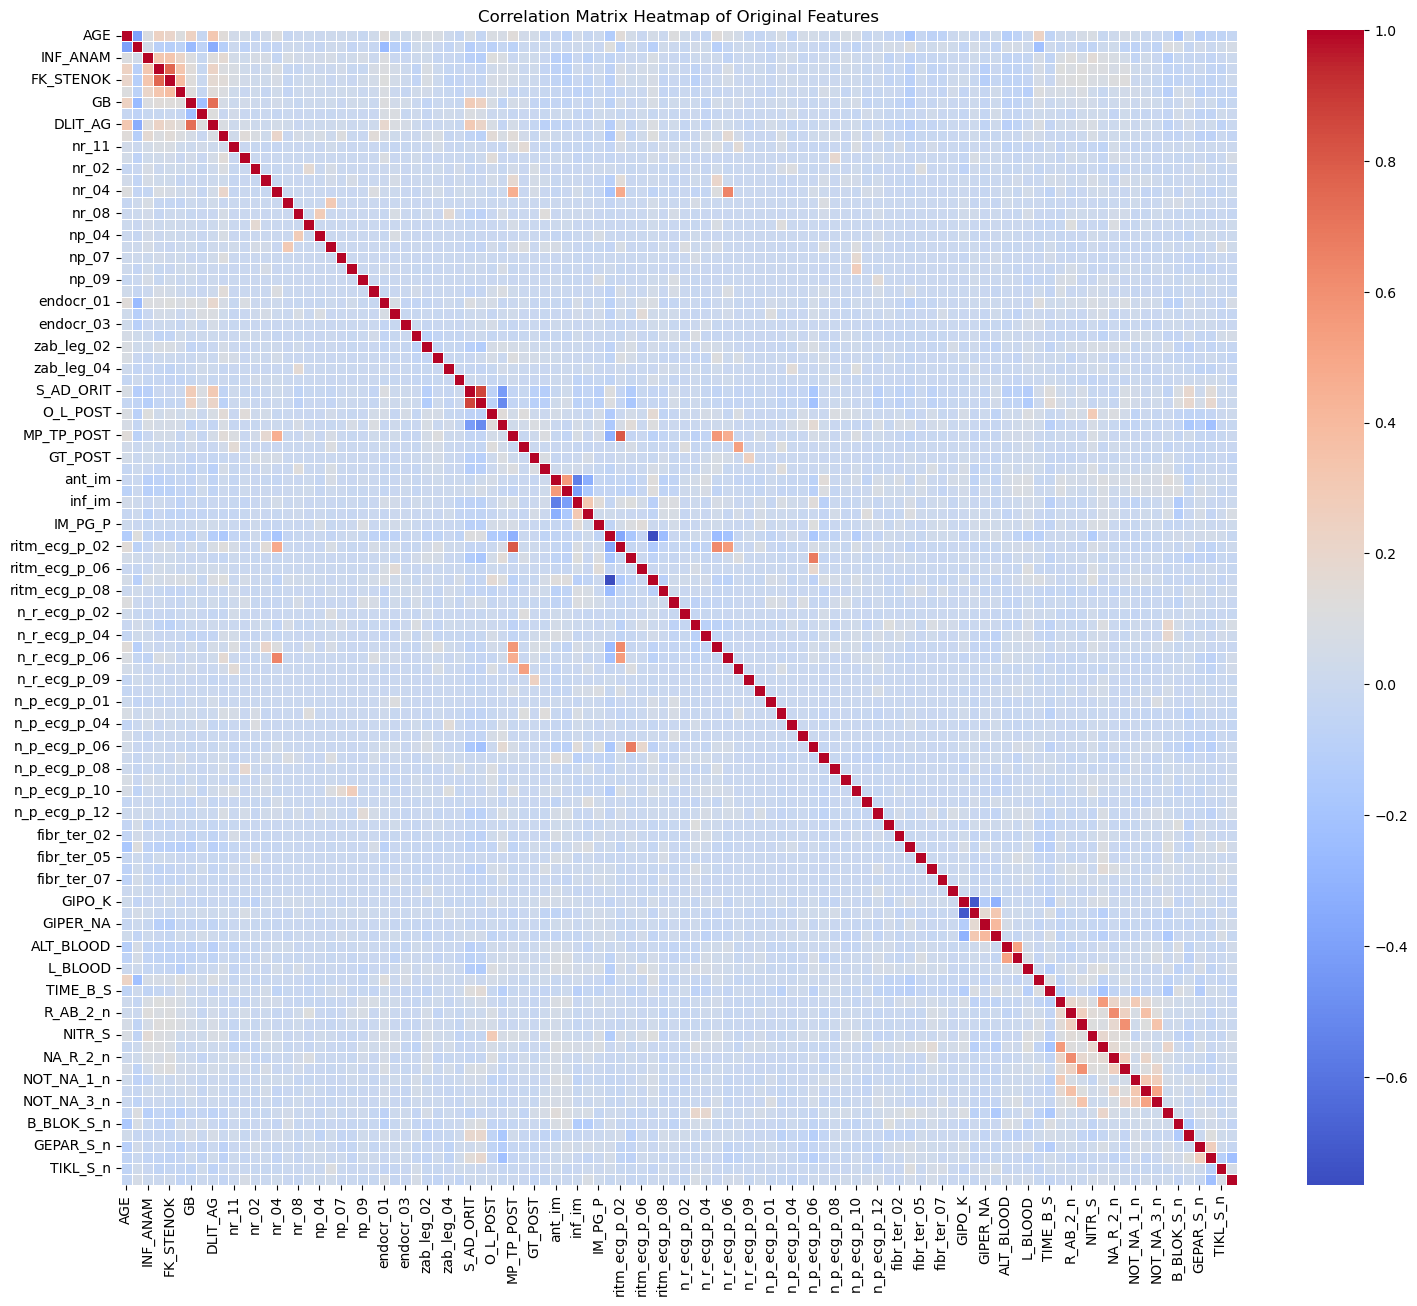

In [7]:
import seaborn as sns

# Calculate the correlation matrix for the reduced features dataframe
corr_matrix = features_imputed.corr()

# Create a heatmap of the correlations
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap of Original Features - null delete')
plt.show()

In [8]:
# Computing correlation matrix for features and targets
feature_corr = features_imputed.corr().abs() # 절대값을 계산해서 0.8 이상인 것들을 높은 상관관계가 있다고 판단
target_corr = target_df.corr().abs()

# Identifying highly correlated features (threshold set at 0.8) # 높은 상관관계들을 모아서 정리
high_corr_feature_pairs = [(i, j) for i in feature_corr.columns for j in feature_corr.columns if (i != j and feature_corr.at[i, j] > 0.8)]
high_corr_target_pairs = [(i, j) for i in target_corr.columns for j in target_corr.columns if (i != j and target_corr.at[i, j] > 0.8)]

high_corr_feature_pairs

[('S_AD_ORIT', 'D_AD_ORIT'),
 ('D_AD_ORIT', 'S_AD_ORIT'),
 ('MP_TP_POST', 'ritm_ecg_p_02'),
 ('ritm_ecg_p_02', 'MP_TP_POST')]

In [9]:
print(high_corr_target_pairs)

[]


In [10]:
print(high_corr_feature_pairs)

[('S_AD_ORIT', 'D_AD_ORIT'), ('D_AD_ORIT', 'S_AD_ORIT'), ('MP_TP_POST', 'ritm_ecg_p_02'), ('ritm_ecg_p_02', 'MP_TP_POST')]


In [15]:
# Create a set to track columns to be removed
columns_to_remove = set()

# Add one of each highly correlated pair to the removal set
for i, j in high_corr_feature_pairs: # 높은 상관계수를 지니는 것들을 지울 data set에 저장
    columns_to_remove.add(j)  # Arbitrarily choose the second of each pair for removal

# Remove the identified columns from the features dataframe 지울 data set에 들어있는 것들과 일치하는 것들을 drop함
features_imputed_reduced = features_imputed.drop(columns=list(columns_to_remove))

# Show the shape of the dataframes before and after
features_imputed.shape, features_imputed_reduced.shape

((1700, 104), (1700, 100))

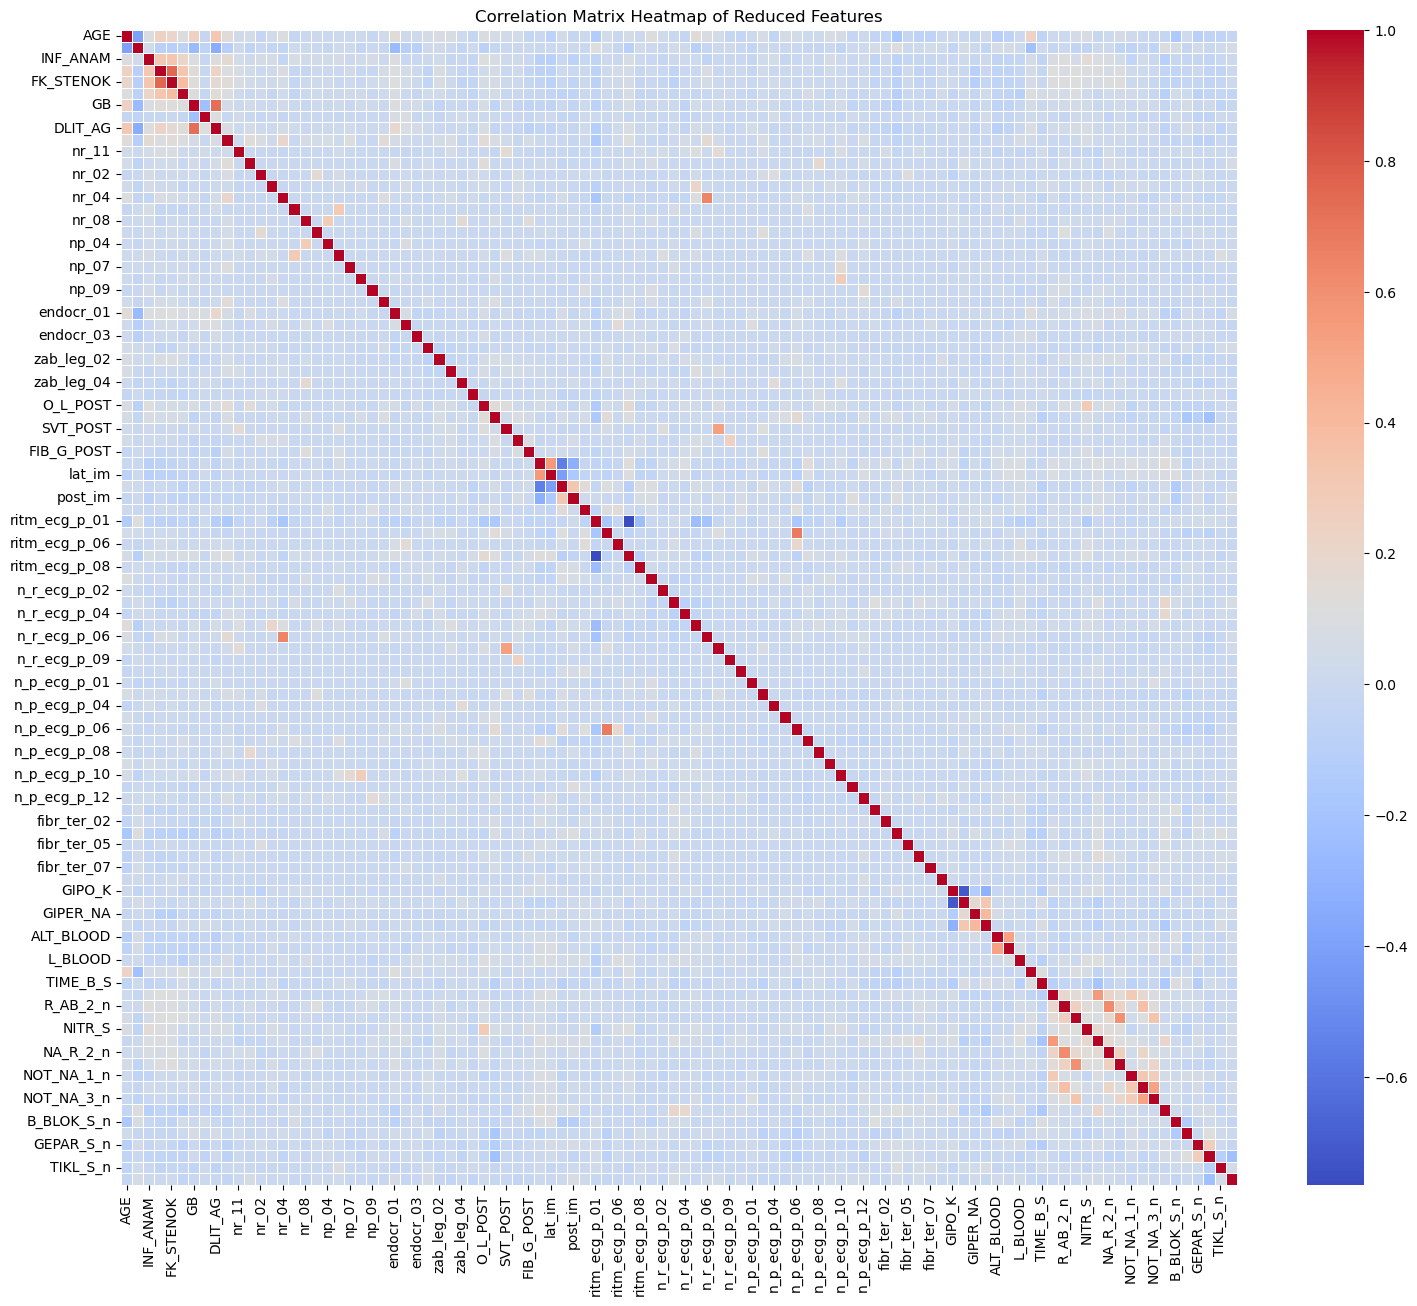

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the reduced features dataframe
corr_matrix_reduced = features_imputed_reduced.corr() # 높은 상관계수를 지닌 것들에 대해서 

# Create a heatmap of the correlations
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix_reduced, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap of Reduced Features')
plt.show()

In [18]:
# Save the reduced features dataset (after removing highly correlated features) to a CSV file
# 전처리 : 결측치 제거(knn) + 상관관계분석
features_imputed_reduced.to_csv('features_reduced_imputed.csv')


'features_reduced_imputed.csv'